The datasets in which we will be using here were obtained via open sources.

---

Let's begin with importing our neeed libraries.

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')
sns.set(font_scale=1.5);

Here, we will be using logistic regression (logistic classification). Logistic regression/classification models use elements from both the linear regression and the KNN algorithms. Let's create a model to utilize the different measurements of properties of glass that can ultimately be used to identify the glass type.

In [2]:
# Let's read in the data #
glass = pd.read_csv('./data/glass.csv')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


**Data Dictionary**

- `RI`: Refractive index
- `(unit measurements: weight percent in corresponding oxide)`
- `Na`: Sodium
- `Mg`: Magnesium
- `Al`: Aluminum
- `Si`: Silicon
- `K`: Potassium
- `Ca`: Calcium
- `Ba`: Barium
- `Fe`: Iron
- `Type`: Type of glass

In [3]:
# Let's change the columns to something more uniform #
glass.columns = ['ri','na','mg','al','si','k','ca','ba','fe','glass_type']

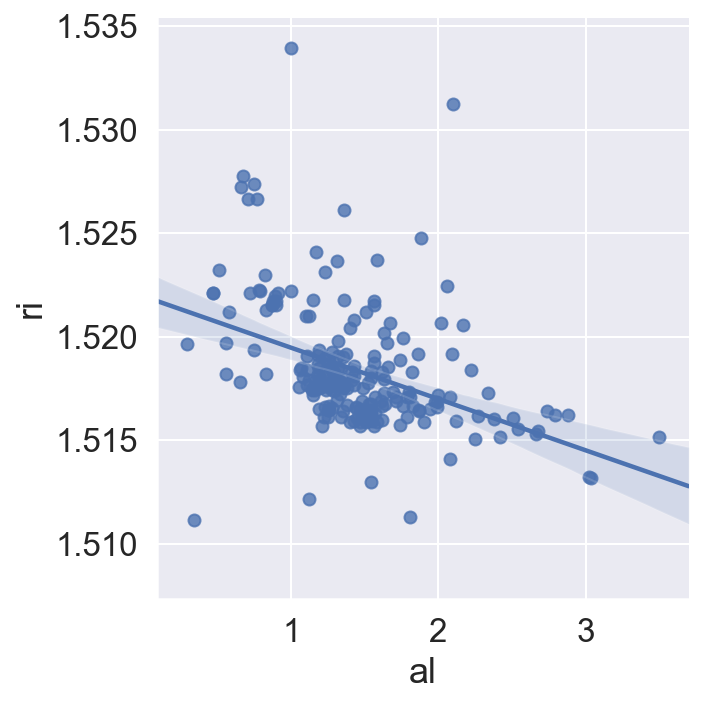

In [4]:
# Let's assume we want to predict ri only using the feature al. Let's create a quick scatter plot #
sns.lmplot(x='al', y='ri', data=glass);

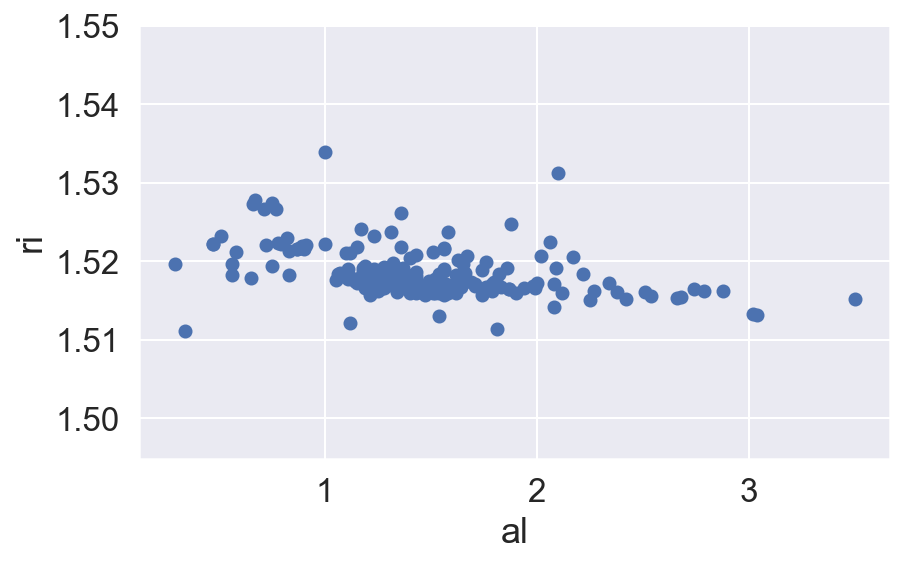

In [5]:
# Let's just take a look at the data points for now #
plt.scatter(glass.al, glass.ri);
plt.xlabel('al');
plt.ylabel('ri');

In [6]:
# Let's check how a linear regression model would fit the data #
linreg = LinearRegression()

feature_cols = ['al']
X = glass[feature_cols]
y = glass.ri

linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

linear intercept: 1.5219453302386425
linear coefficient: [-0.00247761]


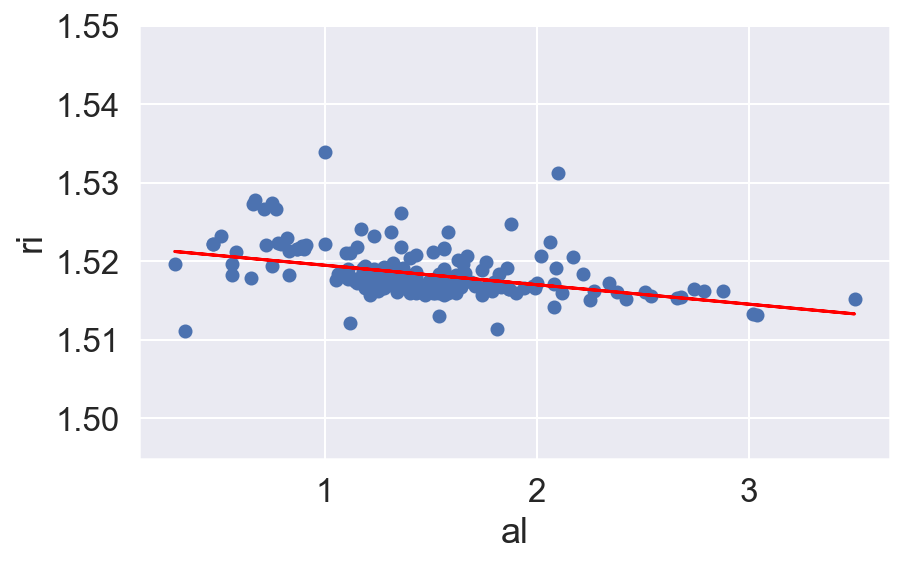

In [7]:
# Let's use the linear regression model to make predictions and compare it to the original data #
y_pred = linreg.predict(X)
glass['y_pred'] = y_pred

plt.scatter(glass.al, glass.ri);
plt.plot(glass.al, glass.y_pred, color='red');
plt.xlabel('al');
plt.ylabel('ri');
print('linear intercept:',linreg.intercept_)
print('linear coefficient:',linreg.coef_)

We can see that linear regression is appropriate when we want to predict the value of a continuous target/response variable, but what about when we want to predict membership in a class or category?

In [8]:
# Let's check out the glass_type feature #
glass.glass_type.value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: glass_type, dtype: int64

Let's assume that these types are subdivisions of broader glass types:

> **Window glass:** types 1, 2, and 3

> **Household glass:** types 5, 6, and 7

In [9]:
# Let's create a new household column that indicates whether or not a row is household glass #
glass['household'] = glass.glass_type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,y_pred,household
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1.519220,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1.518576,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1.518130,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1.518749,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1.518873,0


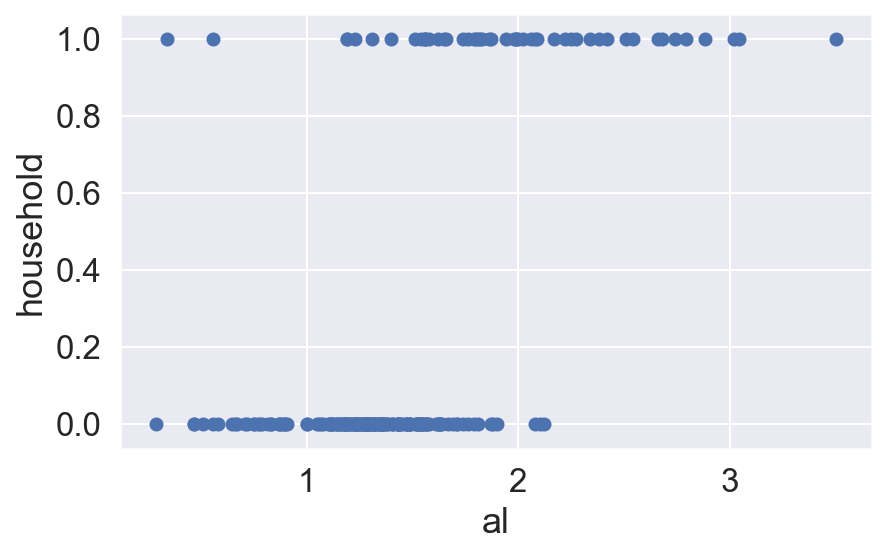

In [10]:
# Now, let's assume that we're predicting the household category using al #
plt.scatter(glass.al, glass.household);
plt.xlabel('al');
plt.ylabel('household');

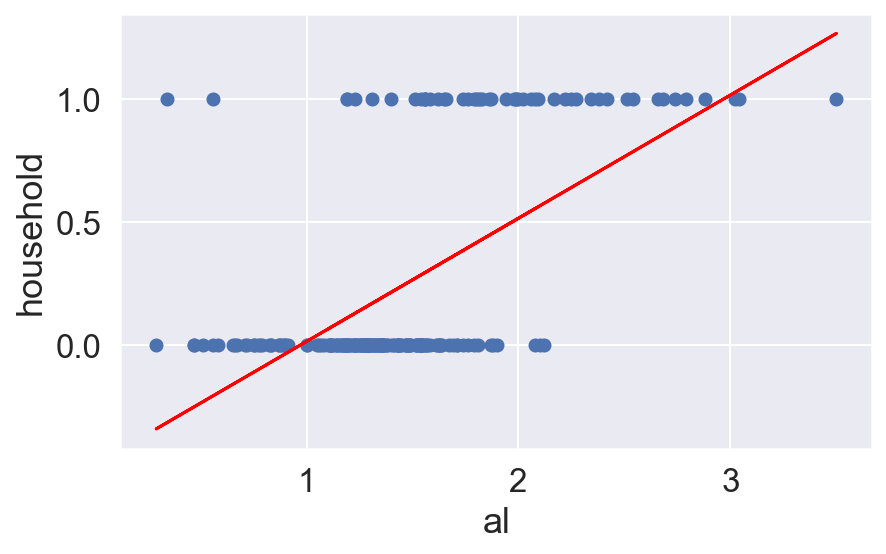

In [11]:
# Like before, let's fit a linear regression model to make predictions and compare it to the original data #
feature_cols = ['al']
X = glass[feature_cols] 
y = glass.household 
linreg.fit(X, y)
glass['household_pred'] = linreg.predict(X)

plt.scatter(glass.al, glass.household);
plt.plot(glass.al, glass.household_pred, color='red');
plt.xlabel('al');
plt.ylabel('household');

We can see above that the linear regression model isn't really useful since our dataset isn't continuous. We need a threshold to differentiate the categories. Let's create a new column of our predictions for whether a row is considered household glass.

In [12]:
# Let's transform household_pred to 1 or 0 #
glass['household_pred_class'] = np.where(glass.household_pred >= 0.5, 1, 0)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,y_pred,household,household_pred,household_pred_class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1.519220,0,0.065459,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1.518576,0,0.195765,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1.518130,0,0.285976,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1.518749,0,0.160682,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1.518873,0,0.135623,0


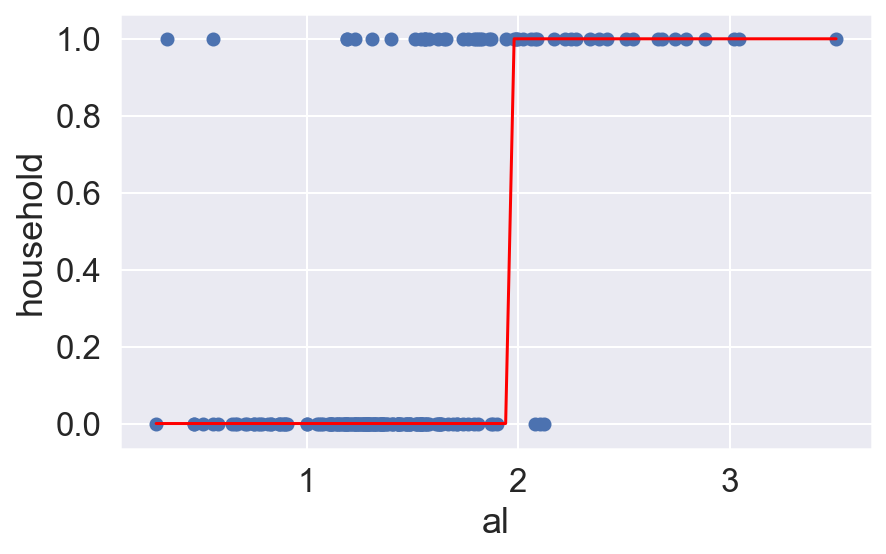

In [13]:
# Let's sort the data values so we can have a continuous line #
glass.sort_values('al', inplace=True)

# Now, let's plot the class predictions #
plt.scatter(glass.al, glass.household);

plt.xlabel('al');
plt.ylabel('household');

plt.plot(glass.al, glass.household_pred_class, color='red');

Logistic regression is a more appropriate method for what we just did with the linear regression model above. This is because the values output from a linear regression cannot be interpreted as probabilities of class membership since their values can be greater than 1 and less than 0. However, logistic regression ensures that the values output as predictions; which can be interpreted as probabilities of class membership. Let's continue with a logistic regression model.

C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


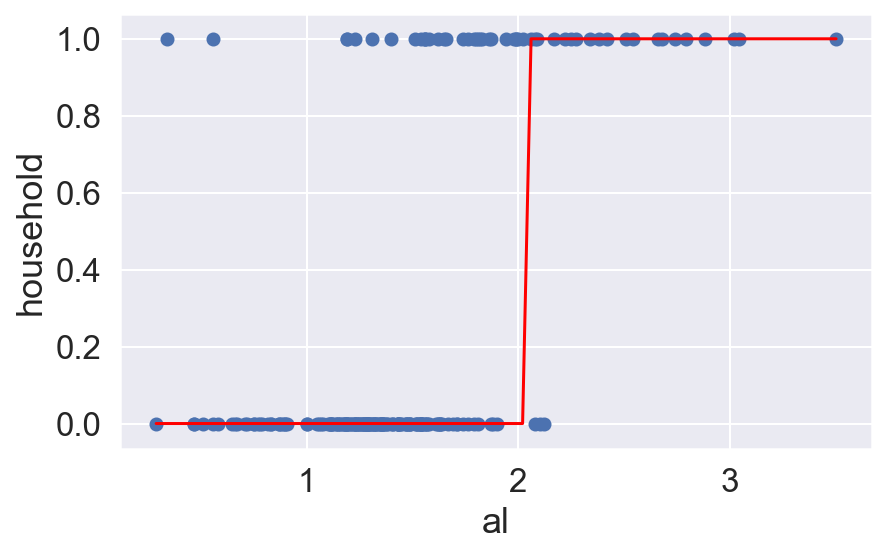

In [14]:
# Let's fit a logistic regression model to make predictions and compare it to the original data #
logreg = LogisticRegression()

feature_cols = ['al']
X = glass[feature_cols]
y = glass.household

logreg.fit(X,y)
pred = logreg.predict(X)

plt.scatter(glass.al, glass.household);
plt.plot(glass.al, pred, color='red');
plt.xlabel('al');
plt.ylabel('household');

In [15]:
# We can also check the predicted probabilities to see how confident we are in a given prediction #
logreg.predict_proba(X)[0:10]

array([[0.97193375, 0.02806625],
       [0.96905681, 0.03094319],
       [0.96017962, 0.03982038],
       [0.96017962, 0.03982038],
       [0.9569876 , 0.0430124 ],
       [0.95265323, 0.04734677],
       [0.95265323, 0.04734677],
       [0.95080573, 0.04919427],
       [0.94378757, 0.05621243],
       [0.94271112, 0.05728888]])

In [16]:
# Let's store the predicted probabilities of class 1 #
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]

glass.sample(10)

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,y_pred,household,household_pred,household_pred_class,household_pred_prob
202,1.51514,14.85,0.00,2.42,73.72,0.00,8.39,0.56,0.00,7,1.515950,1,0.727012,1,0.676709
105,1.52475,11.45,0.00,1.88,72.19,0.81,13.24,0.00,0.34,2,1.517287,0,0.456377,0,0.414051
206,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.00,7,1.517312,1,0.451365,0,0.409180
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.00,1,1.518551,0,0.200776,0,0.202160
60,1.51905,13.60,3.62,1.11,72.64,0.14,8.76,0.00,0.00,1,1.519195,0,0.070470,0,0.130595
201,1.51653,11.95,0.00,1.19,75.18,2.70,8.93,0.00,0.00,7,1.518997,1,0.110564,0,0.149971
200,1.51508,15.15,0.00,2.25,73.50,0.00,8.34,0.63,0.00,7,1.516371,1,0.641812,1,0.597924
151,1.52127,14.32,3.90,0.83,71.50,0.00,9.49,0.00,0.00,3,1.519889,0,-0.069859,0,0.078798
15,1.51761,12.81,3.54,1.23,73.24,0.58,8.39,0.00,0.00,1,1.518898,0,0.130612,0,0.160517
121,1.51663,12.93,3.54,1.62,72.96,0.64,8.03,0.00,0.21,2,1.517932,0,0.326071,0,0.295233


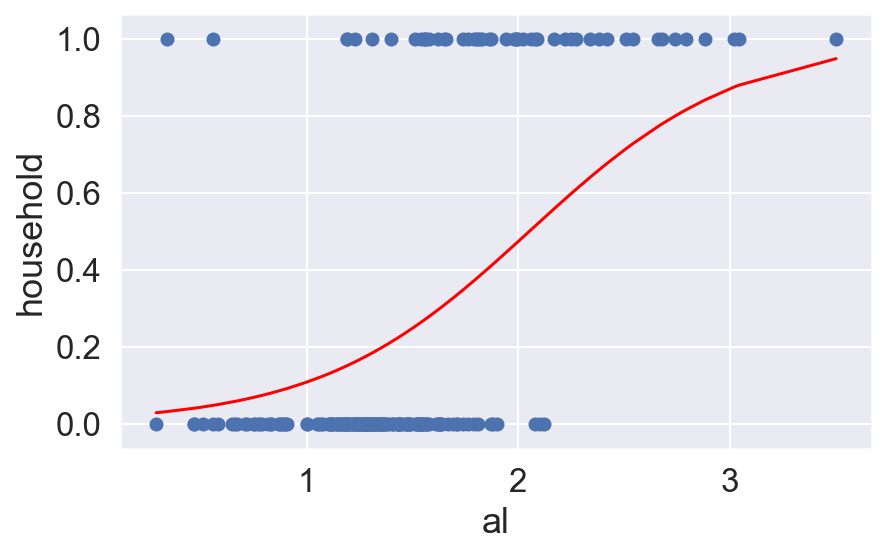

In [17]:
# Let's plot the predicted probabilities #
plt.scatter(glass.al, glass.household);
plt.plot(glass.al, glass.household_pred_prob, color='red');
plt.xlabel('al');
plt.ylabel('household');

Let's create a logistic regression model and train it using two features to predict the glass type. 

In [18]:
LR = LogisticRegression()
X = glass[['na','fe']]
y = glass.household

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

LR.fit(X_train,y_train)

y_pred = LR.predict(X_test)

print('accuracy:',LR.score(X_test, y_test))

accuracy: 0.7962962962962963


C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
